In [2]:
# Augument functions

import cv2 as cv
import numpy as np
import random

def rotate_image(image, range = (-20,20)):
    height, width = image.shape[:2]
    center = (height // 2, width // 2)
    angle = random.randint(*range)
    scale = 1.0

    matrix =  cv.getRotationMatrix2D(center, angle, scale)
    rotated = cv.warpAffine(
        image,
        matrix,
        (width, height),
        flags=cv.INTER_LINEAR,
        borderMode=cv.BORDER_REFLECT
    )

    return rotated


def flip_image(image):
    flip_code = random.choice([-1, 0, 1])
    flipped = cv.flip(image, flip_code)
    return flipped

def zoom_image(image, zoom_range = (1, 1.3)):
    zoom_factor = random.uniform(*zoom_range)

    height, width = image.shape[:2]
    new_height = int(height * zoom_factor)
    new_width = int(width * zoom_factor)

    # Resize the image
    resized_image = cv.resize(image, (new_width, new_height))

    # Calculate the region of interest (ROI)
    roi_x = int((new_width - width) / 2)
    roi_y = int((new_height - height) / 2)
    roi_width = width
    roi_height = height

    zoomed_image = resized_image[roi_y:roi_y+roi_height, roi_x:roi_x+roi_width]

    return zoomed_image


def adjust_brightness_contrast(
    image,
    alpha_range=(1.0, 1.8),
    beta_range=(-30, 30)
):
    """
    alpha: contrast control
    beta : brightness control
    """

    alpha = random.uniform(*alpha_range)
    beta = random.randint(*beta_range)

    adjusted = cv.convertScaleAbs(
        image,
        alpha=alpha,
        beta=beta
    )

    return adjusted
def add_gaussian_noise(image, mean=0, std_range=(5, 25)):
    std = random.uniform(*std_range)

    noise = np.random.normal(
        mean,
        std,
        image.shape
    ).astype(np.float32)

    noisy = image.astype(np.float32) + noise

    noisy = np.clip(noisy, 0, 255).astype(np.uint8)

    return noisy

def augument_image(image):
    options = [rotate_image, flip_image, zoom_image, adjust_brightness_contrast, add_gaussian_noise]
    k = random.randint(1, len(options))
    selected = random.choices(options, k=k)

    for aug_func in selected:
        image = aug_func(image)
    return image


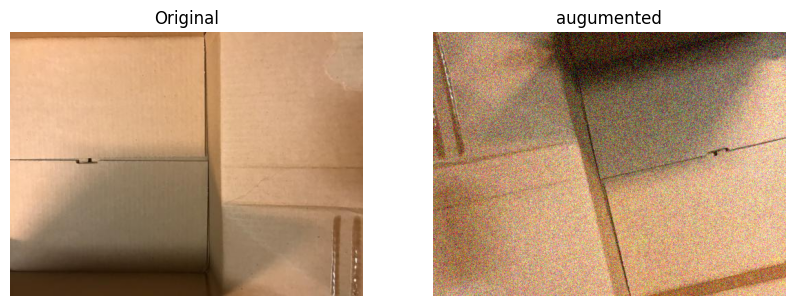

In [6]:
# Test augument functions
import cv2 as cv
import matplotlib.pyplot as plt

src = "../dataset/cardboard/0a852349-3675-4471-9f16-bed7d5f7ec76.jpg"

img = cv.imread(src)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

aug = augument_image(img)

ig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].imshow(img)
ax[0].set_title("Original")
ax[0].axis("off")

ax[1].imshow(aug)
ax[1].set_title("augumented")
ax[1].axis("off")

plt.show()

In [ ]:
# Dataset Augumentation
import os
import cv2 as cv

DATASET_Path = "../dataset/"
AUG_PATH = "../aug_dataset"
TARGET = 500
IMAGE_SIZE = (128, 128)

os.makedirs(AUG_PATH)

for Nclass in os.listdir(DATASET_Path):
    src = os.path.join(DATASET_Path, Nclass)
    dst = os.path.join(AUG_PATH, Nclass)
    
    os.makedirs(dst, exist_ok=True)

    src_images = os.listdir(src)
    for img_name in src_images:
        # read the image
        img = cv.imread(os.path.join(src, img_name))
        if img is None:
            print(f"Could not read img: {img_name}")
            continue
        # resize it to be 128*128
        img = cv.resize(img, IMAGE_SIZE)
        # save it
        cv.imwrite(os.path.join(dst, img_name), img)

    
    aug_images = os.listdir(dst)
    aug_images_size = len(aug_images)
    i = 0
    while aug_images_size < TARGET:
        # choose random pic
        img_name = random.choice(aug_images)
        # read the image
        img = cv.imread(os.path.join(dst, img_name))
        # add augumentation to it 
        aug_img = augument_image(img)
        # save it 
        cv.imwrite(os.path.join(dst, f"aug_{i}_{img_name}"),aug_img)
        
        aug_images_size+=1
        i+=1


In [ ]:
# verify augumentation ran successfully
import os

AUG_PATH = "../aug_dataset"
for Nclass in os.listdir(AUG_PATH):
    dst = os.path.join(AUG_PATH, Nclass)
    print(f"{Nclass}: {len(
        os.listdir(dst)
    )}")